In [1]:
# numerical computation
import numpy as np

# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

# import sklearn
from sklearn.preprocessing import LabelEncoder

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":15})     

# dataframe management
import pandas as pd

from operator import itemgetter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from IPython.display import clear_output

In [2]:
crg_6144 = pd.read_csv('../CRGs/datasets/matrix_CRG6144.csv')
crg_6144.head()

,Edad,Sexo,001,002,003,004,005,006,007,008,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,52,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
crg_6144.shape

(3179, 2265)

#### Controlamos si hay algún valor nulo con:

In [4]:
Edad = crg_6144[crg_6144.columns[0:1]]
columnas_Edad = list(Edad.columns.values)

Genero = crg_6144[crg_6144.columns[1:2]]
columnas_Edad = list(Edad.columns.values)

Diagnostico = crg_6144[crg_6144.columns[2:1519]]
columnas_Diagnostico = list(Diagnostico.columns.values)

Farmacia = crg_6144[crg_6144.columns[1519:]]
columnas_Farmacia = list(Farmacia.columns.values)

N_Pacientes = crg_6144.shape[0]

In [5]:
print(Edad.isnull().any().any())
print(Genero.isnull().any().any())
print(Diagnostico.isnull().any().any())
print(Farmacia.isnull().any().any())

False
False
False
False


#### Ahora con Género

In [6]:
femenino = Genero[Genero == 2]
femenino = femenino.fillna(value =0)

masculino = Genero[Genero == 1]
masculino = masculino.fillna(value =0)

femenino = femenino['Sexo'].tolist()
Genero.insert(1, 'Femenino', femenino)

masculino = masculino['Sexo'].tolist()
Genero.insert(2, 'Masculino', masculino)

del(Genero['Sexo'])
Genero = (Genero>0.0)*1

### Ahora que tenemos todos los datos bien estructurados, vamos a volver a juntarlos

In [7]:
crg_6144_new = pd.concat([Edad, Genero, Diagnostico, Farmacia], axis = 1)
columnas_data =list(crg_6144_new.columns.values)
print(crg_6144_new.shape)
crg_6144_new.head()

(3179, 2266)


,Edad,Femenino,Masculino,001,002,003,004,005,006,007,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,52,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,67,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
crg_6144_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,3179.0,61.891475,11.073295,10.0,55.0,61.0,68.0,99.0
Femenino,3179.0,0.447940,0.497361,0.0,0.0,0.0,1.0,1.0
Masculino,3179.0,0.552060,0.497361,0.0,0.0,1.0,1.0,1.0
001,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
003,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
004,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
edad = crg_6144_new[crg_6144_new.columns[:1]]
columnas_edad = list(edad.columns.values)

genero = crg_6144_new[crg_6144_new.columns[1:3]]
columnas_genero = list(genero.columns.values)

diagnostico = crg_6144_new[crg_6144_new.columns[3:1520]]
columnas_diagnostico = list(diagnostico.columns.values)

farmacia = crg_6144_new[crg_6144_new.columns[1520:]]
columnas_farmacia = list(farmacia.columns.values)

In [10]:
enfermedades = diagnostico[diagnostico.columns[:999]]
columnas_enfermedades = list(enfermedades.columns.values)

codigo_v = diagnostico[diagnostico.columns[999:1090]]
columnas_codigo_v = list(codigo_v.columns.values)


In [11]:
N_mujeres = crg_6144_new[crg_6144_new['Femenino']==1].shape[0]

print('Porcenjate Mujeres: %.3f'% round((N_mujeres/N_Pacientes)*100, 3))

N_hombres = crg_6144_new[crg_6144_new['Masculino']==1].shape[0]

print('Porcenjate Hombres: %.3f'% round((N_hombres/N_Pacientes)*100, 3))

round(sum(crg_6144_new[crg_6144_new['Femenino']==1][crg_6144_new.columns[1520:]].sum())/N_mujeres, 2)

Porcenjate Mujeres: 44.794
Porcenjate Hombres: 55.206


57.29

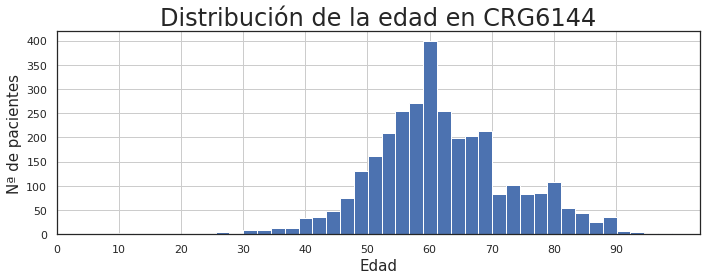

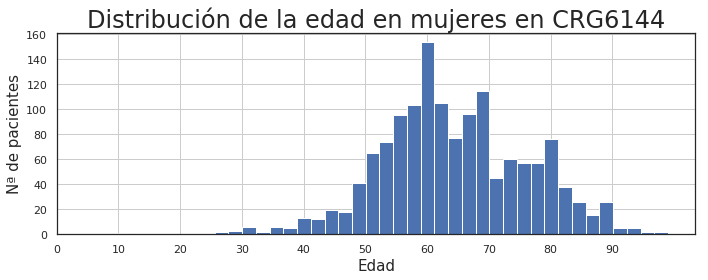

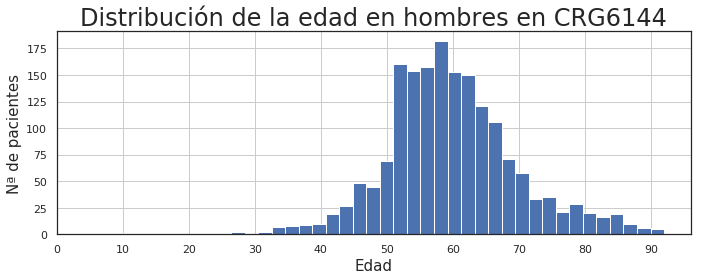

In [12]:
C = crg_6144_new[crg_6144_new.columns[:1]]
plt.figure(figsize=(10,4))
plt.hist(C.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en CRG6144')
plt.savefig("pictures/CRG6144/CRG6144_EDAD.png")
plt.tight_layout()
plt.show()

A = crg_6144_new[crg_6144_new.columns[:1]][crg_6144_new.Femenino==1]
plt.figure(figsize=(10,4))
plt.hist(A.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en mujeres en CRG6144')
plt.savefig("pictures/CRG6144/CRG6144_EDAD_mujeres.png")
plt.tight_layout()
plt.show()

B = crg_6144_new[crg_6144_new.columns[:1]][crg_6144_new.Masculino==1]
plt.figure(figsize=(10,4))
plt.hist(B.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en hombres en CRG6144')
plt.savefig("pictures/CRG6144/CRG6144_EDAD_HOMBRES.png")
plt.tight_layout()
plt.show()

# Ocurrencia

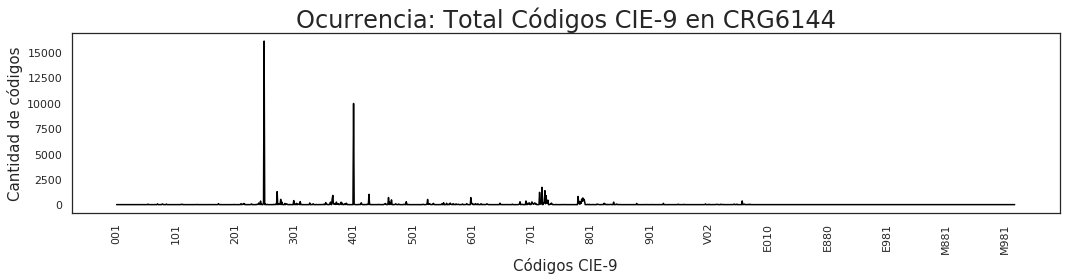

In [13]:
ploting = crg_6144_new[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de códigos')         
plt.xlabel('Códigos CIE-9')
plt.title('Ocurrencia: Total Códigos CIE-9 en CRG6144')
plt.tight_layout()
plt.savefig("pictures/CRG6144/CRG6144_O_CIE.png")     
plt.show()

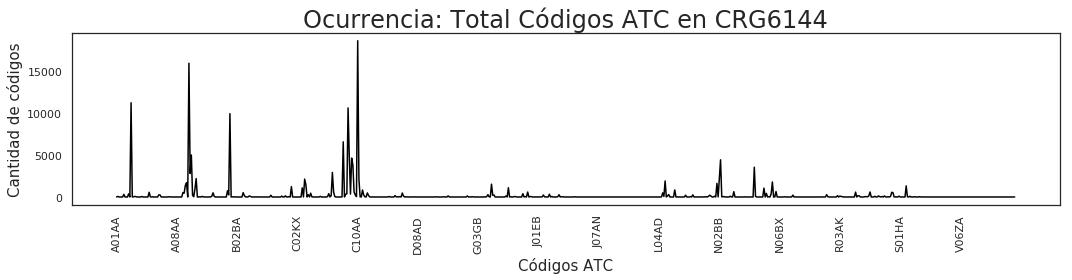

In [14]:
ploting = crg_6144_new[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')        
plt.xlabel('Códigos ATC')
plt.title('Ocurrencia: Total Códigos ATC en CRG6144')
plt.tight_layout()
plt.savefig("pictures/CRG6144/CRG6144_O_ATC.png")     
plt.show()

## Ocurrencia de códigos CIE-9 según el genero

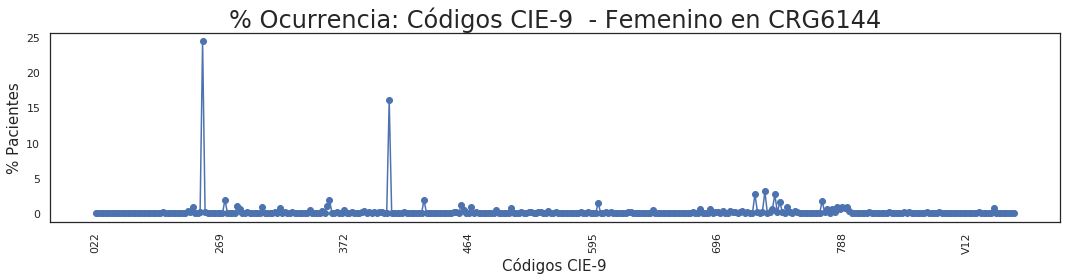

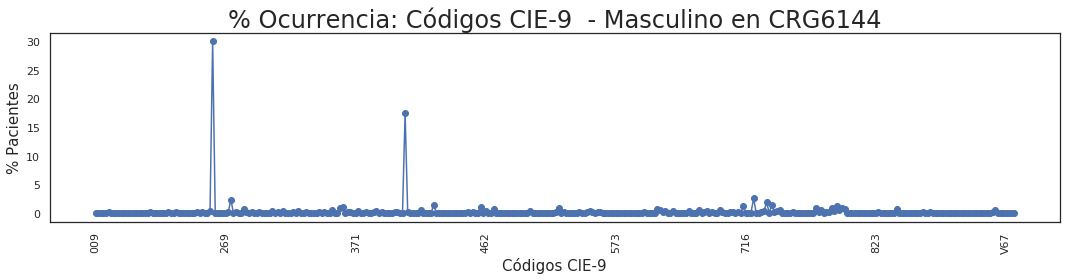

In [15]:
for g in columnas_genero:
    A = crg_6144_new[columnas_diagnostico][crg_6144_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.title('% Ocurrencia: Códigos CIE-9  - {} en CRG6144'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG6144/CRG6144_O_CIE_{}.png".format(g))        
        plt.show()


In [16]:
for g in columnas_genero:
    A = crg_6144_new[columnas_enfermedades][crg_6144_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_enfermedades, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
250     24.725023
401     16.262930
719      3.152416
715      2.792327
724      2.717035
Grupos mayoritarios para Masculino
            Valor
Código           
250     30.325601
401     17.705895
719      2.624672
272      2.408314
724      1.929489


## Ocurrencia  de ATC según el genero

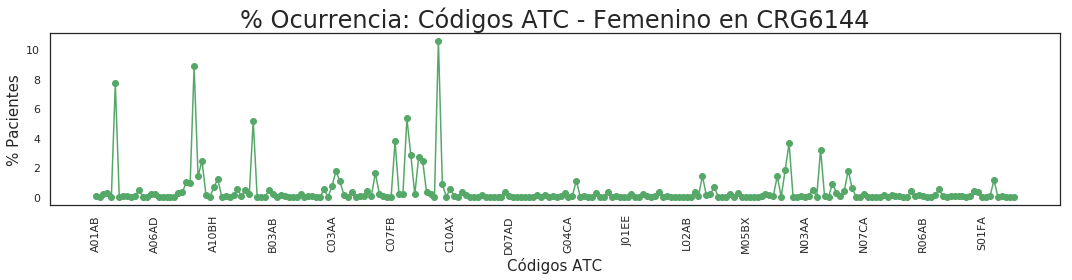

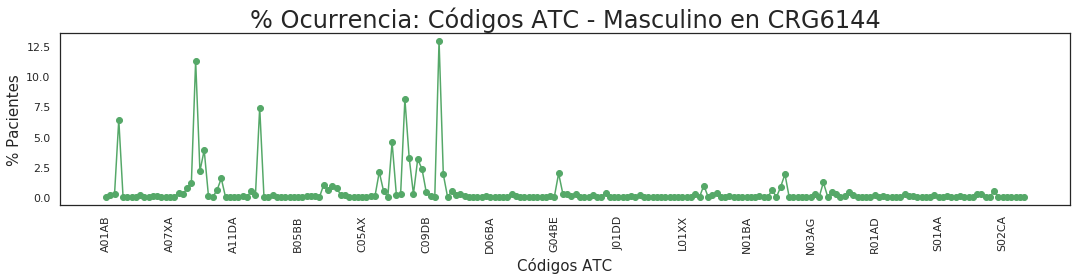

In [17]:
for g in columnas_genero:
    A = crg_6144_new[columnas_farmacia][crg_6144_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.xticks(range(0, len(valor), 15), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.title('% Ocurrencia: Códigos ATC - {} en CRG6144'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG6144/CRG6144_O_ATC_{}.png".format(g))        
        plt.show()

In [18]:
for g in columnas_genero:
    A = crg_6144_new[columnas_farmacia][crg_6144_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
C10AA   10.585668
A10BA    8.849991
A02BC    7.705131
C09AA    5.319801
B01AC    5.159226
Grupos mayoritarios para Masculino
            Valor
Código           
C10AA   12.962271
A10BA   11.316207
C09AA    8.138800
B01AC    7.425979
A02BC    6.426997


--------------------------------------------------------------

# Presencia

In [19]:
presencia = (crg_6144_new[crg_6144_new.columns[3:]]>0)*1
crg_6144_new_P = pd.concat([Edad, Genero, presencia], axis = 1)

In [20]:
crg_6144_new_P.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,3179.0,61.891475,11.073295,10.0,55.0,61.0,68.0,99.0
Femenino,3179.0,0.447940,0.497361,0.0,0.0,0.0,1.0,1.0
Masculino,3179.0,0.552060,0.497361,0.0,0.0,1.0,1.0,1.0
001,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
003,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
004,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,3179.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


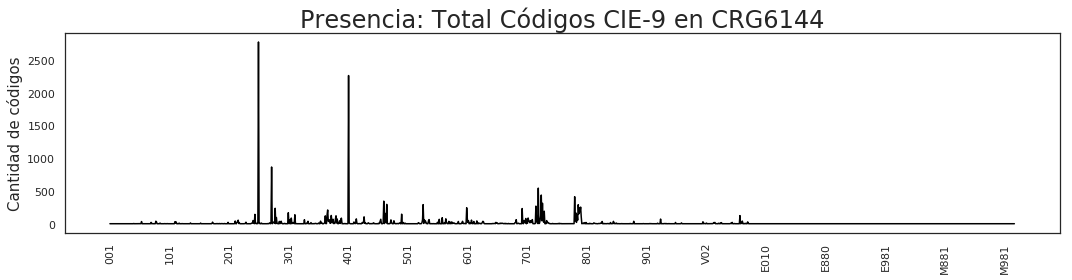

In [21]:
ploting = crg_6144_new_P[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de códigos')        
plt.ylabel('Cantidad de códigos')  
plt.title('Presencia: Total Códigos CIE-9 en CRG6144')
plt.tight_layout()
plt.savefig("pictures/CRG6144/CRG6144_P_CIE.png")     
plt.show()

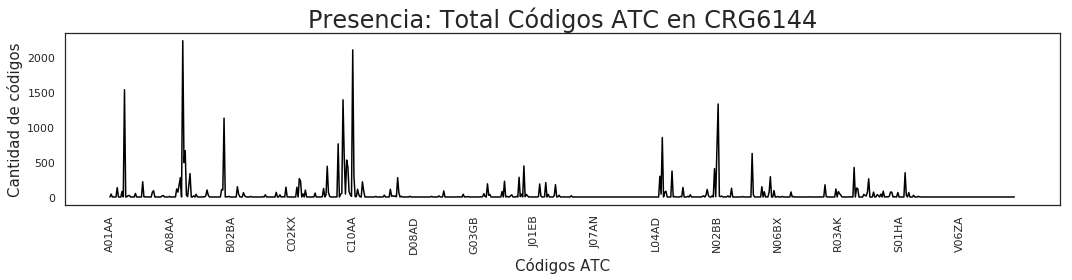

In [22]:
ploting = crg_6144_new_P[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')          
plt.xlabel('Códigos ATC')
plt.title('Presencia: Total Códigos ATC en CRG6144')
plt.tight_layout()
plt.savefig("pictures/CRG6144/CRG6144_P_ATC.png")     
plt.show()

## Presencia de diagnosticos según el grupo de edad y genero

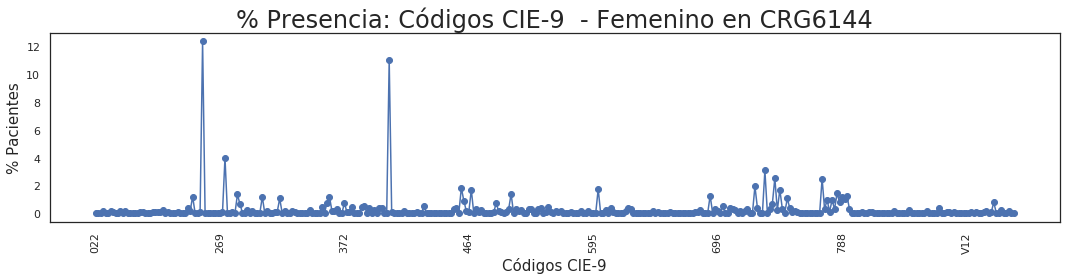

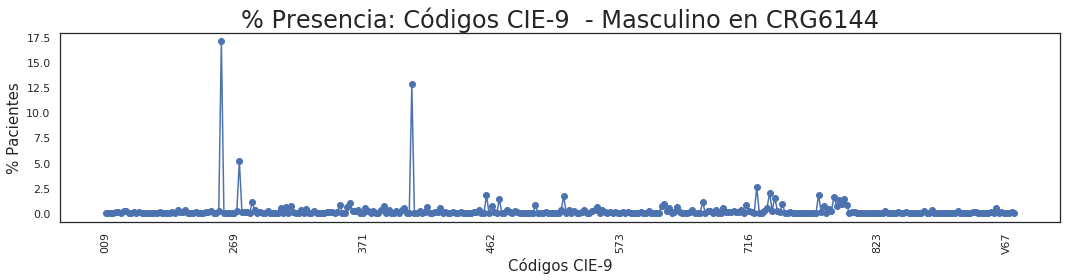

In [23]:
for g in columnas_genero:
    A = crg_6144_new_P[columnas_diagnostico][crg_6144_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.title('% Presencia: Códigos CIE-9  - {} en CRG6144'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG6144/CRG6144_P_CIE_{}.png".format(g))        
        plt.show()



In [24]:
for g in columnas_genero:
    A = crg_6144_new_P[columnas_diagnostico][crg_6144_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_diagnostico, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
250     12.361679
401     11.015851
272      4.007577
719      3.090420
724      2.542119
Grupos mayoritarios para Masculino
            Valor
Código           
250     17.026459
401     12.841802
272      5.147791
719      2.590501
724      2.025905


## Presencia  de farmacos según el genero y edad

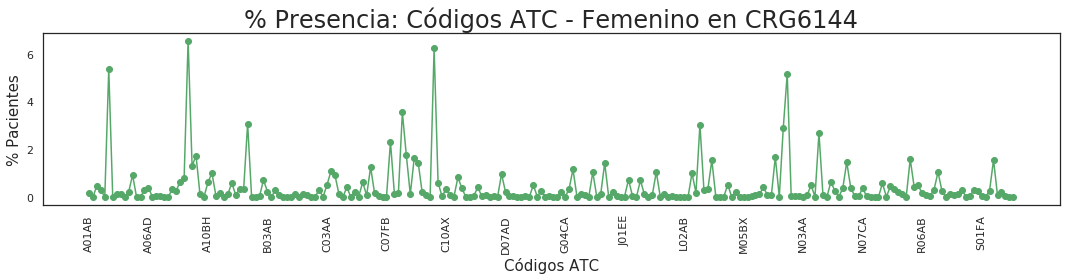

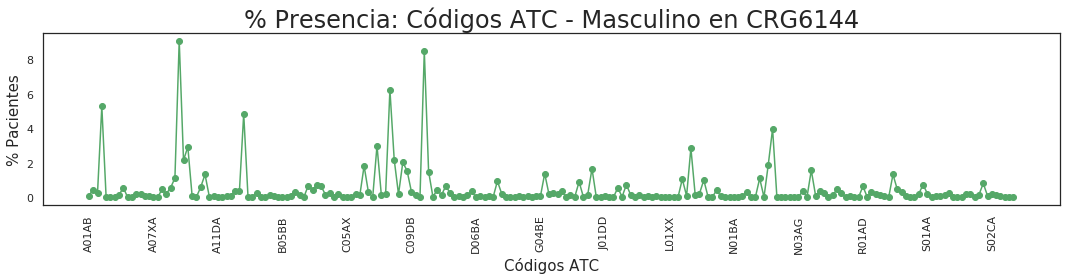

In [25]:
for g in columnas_genero:
    A = crg_6144_new_P[columnas_farmacia][crg_6144_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.xticks(range(0, len(valor), 15), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.title('% Presencia: Códigos ATC - {} en CRG6144'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG6144/CRG6144_P_ATC_{}.png".format(g))        
        plt.show()

In [26]:
for g in columnas_genero:
    A = crg_6144_new_P[columnas_farmacia][crg_6144_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
           Valor
Código          
A10BA   6.550418
C10AA   6.230408
A02BC   5.355277
N02BE   5.172414
C09AA   3.546238
Grupos mayoritarios para Masculino
           Valor
Código          
A10BA   9.080258
C10AA   8.479789
C09AA   6.239016
A02BC   5.272408
B01AC   4.840363


# Multilabel

In [33]:
crg_6144_with_labels_O = crg_6144
crg_6144_with_labels_O['HP'] = np.ones(N_Pacientes, dtype=int)
crg_6144_with_labels_O['Diabetes'] = np.ones(N_Pacientes, dtype=int)
crg_6144_with_labels_O['Otros'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_labels_O['M01AE'].describe()

count    3179.000000
mean        0.602391
std         1.576597
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        28.000000
Name: M01AE, dtype: float64

In [34]:
crg_6144_with_labels_O.to_csv('datasets/label/crg_6144_with_labels_O.csv', index=False)

In [30]:
crg_6144_with_labels_P =pd.concat([Edad, crg_6144[crg_6144.columns[1:2]], presencia], axis = 1)
crg_6144_with_labels_P['HP'] = np.ones(N_Pacientes, dtype=int)
crg_6144_with_labels_P['Diabetes'] = np.ones(N_Pacientes, dtype=int)
crg_6144_with_labels_P['Otros'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_labels_P['M01AE'].describe()

count    3179.000000
mean        0.268953
std         0.443485
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: M01AE, dtype: float64

In [31]:
crg_6144_with_labels_P.to_csv('datasets/label/crg_6144_with_labels_P.csv', index=False)

# Multi clase

In [27]:
crg_6144_with_classes_O = pd.read_csv('../CRGs/datasets/matrix_CRG6144.csv')
crg_6144_with_classes_O['CRG1000'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_classes_O['CRG5192'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_classes_O['CRG5424'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_classes_O['CRG6144'] = np.ones(N_Pacientes, dtype=int)
crg_6144_with_classes_O['CRG7071'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_classes_O['M01AE'].describe()

count    3179.000000
mean        0.602391
std         1.576597
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        28.000000
Name: M01AE, dtype: float64

In [28]:
crg_6144_with_classes_O.to_csv('datasets/class/crg_6144_with_classes_O.csv', index=False)

In [35]:
crg_6144_with_classes_P = pd.concat([Edad, crg_6144[crg_6144.columns[1:2]], presencia], axis = 1)
crg_6144_with_classes_P['CRG1000'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_classes_P['CRG5192'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_classes_P['CRG5424'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_classes_P['CRG6144'] = np.ones(N_Pacientes, dtype=int)
crg_6144_with_classes_P['CRG7071'] = np.zeros(N_Pacientes, dtype=int)
crg_6144_with_classes_P['M01AE'].describe()

count    3179.000000
mean        0.268953
std         0.443485
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: M01AE, dtype: float64

In [36]:
crg_6144_with_classes_P.to_csv('datasets/class/crg_6144_with_classes_P.csv', index=False)